# Analysis of Bank Stocks Throughout the Financial Crisis 
____

## Overview
In this data project, I will focus on bank stocks and perform exploratory data analysis of stock prices to see how they progressed throughout the financial crisis all the way to early 2016.

## The Imports

In [173]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

## About the Data

I will get stock information for the following banks using pandas datareader:
* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

In [175]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [176]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers

In [177]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list.

In [178]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)

Set the column name levels.

In [179]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

Check the data

In [180]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.953278  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   35.571438  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   35.617275  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   35.563797  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   35.586720  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  38.591286  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  38.617764  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  38.723652  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  38.763355  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  39.173679  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  21.485973  
2006-01-04   31.799999  31.530001  10870000.0  21.236753  
2006-01-05   31.500000  31.495001  10158000.0  21.213186  
2006-01-06   31.580000  31.680000   8403800.0  21.337786  
2006-01-09   31.674999  31.674999   5619600.0  21.334421  

[5 rows x 36 columns]

In [181]:
bank_stocks = pd.read_pickle('all_banks')

## EDA  

In this section, I will explore the discriptive statistics of the *Close Price*, *Volume*, *Return* and *Moving Average* for each bank's stock throughout the time period. I'll also do some visualizations to spot the trend and differences.

### Close Prices
- The minimum *Close price* for each bank's stock throughout the time period

In [186]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').min()

Bank Ticker
BAC     3.14
C       4.52
GS     52.00
JPM    15.90
MS      9.20
WFC     8.12
dtype: float64

- The maxumum *Close price* for each bank's stock throughout the time period

In [187]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

- The standard deviation of *Close price* for each bank's stock throughout the time period

In [185]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').std()

Bank Ticker
BAC     15.304852
C      177.409683
GS      35.638164
JPM      9.839705
MS      18.669476
WFC     10.012581
dtype: float64

As is shown above, the stocks prices varied a lot during 2006--2016. And notice that CitiGroup stands out with an extreme high variance which is so anomal that need further investigation.

- *Close price* for each bank for the entire index of time

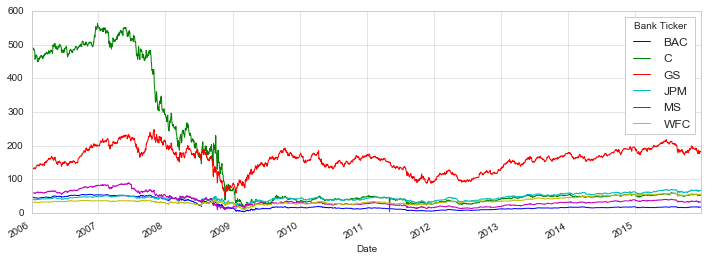

In [202]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(12,4))

Obviously, the stock prices of Goldman Sachs and CitiGroup decreased drastically from 2008 to 2009 especially for CitiGroup. At the turning point of 2009 and 2010, Goldman Sachs experienced a great bounce. Its price defeated CitiGroup which turned over the situation before 2009. In contrast, the stocks prices rest of the banks were pretty stable.

Let's use an interactive plot to have a closer look what was happened.

In [203]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

### Volume

- The minimum *Volume* for each bank's stock throughout the time period

In [204]:
bank_stocks.xs(key='Volume', axis=1, level='Stock Info').min()

Bank Ticker
BAC    4836000
C       632860
GS      697700
JPM    2927000
MS     1120500
WFC    2392000
dtype: int64

- The maximum *Volume* for each bank's stock throughout the time period

In [206]:
bank_stocks.xs(key='Volume', axis=1, level='Stock Info').max()

Bank Ticker
BAC    1226791285
C       513178690
GS      114590630
JPM     217294160
MS      329786042
WFC     478736573
dtype: int64

Overall speaking, although Bank of America's stock price was the lowest, it seems to posses the biggest volume which is an unparalleled advantage over other banks.

Let's visualize the stocks prices over time to see whether this is the case.

- *Volume* for each bank for the entire index of time

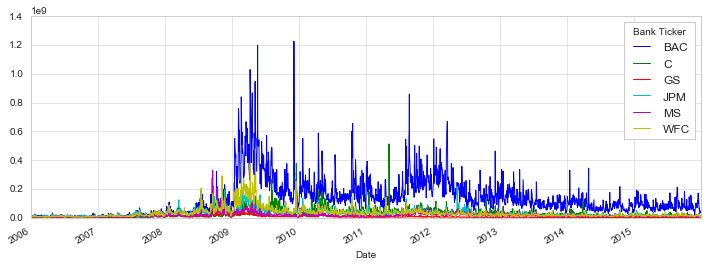

In [201]:
bank_stocks.xs(key='Volume', axis=1, level='Stock Info').plot(figsize=(12,4))

In [209]:
bank_stocks.xs(key='Volume', axis=1, level='Stock Info').iplot()

We can tell from the plot that Bank of America started to boost in *Volume* since 2009 and enjoyed another significant increase during 2012 and 2013. Its *Volume* was approximately several times as many as the others since 2009.

### Return

Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [212]:
returns = pd.DataFrame()

Use pandas pct_change() method on the *Close* column to create a column representing this return value.

In [213]:
for tick in tickers:
    returns[tick + 'Return'] = bank_stocks[tick]['Close'].pct_change()

In [214]:
returns.head()

BACReturn   CReturn  GSReturn  JPMReturn  MSReturn  WFCReturn
Date                                                                     
2006-01-03        NaN       NaN       NaN        NaN       NaN        NaN
2006-01-04  -0.010620 -0.018462 -0.013812  -0.014183  0.000686  -0.011599
2006-01-05   0.001288  0.004961 -0.000393   0.003029  0.002742  -0.000951
2006-01-06  -0.001501  0.000000  0.014169   0.007046  0.001025   0.005714
2006-01-09   0.000644 -0.004731  0.012030   0.016242  0.010586   0.000000

- Pairplot of the returns dataframe.

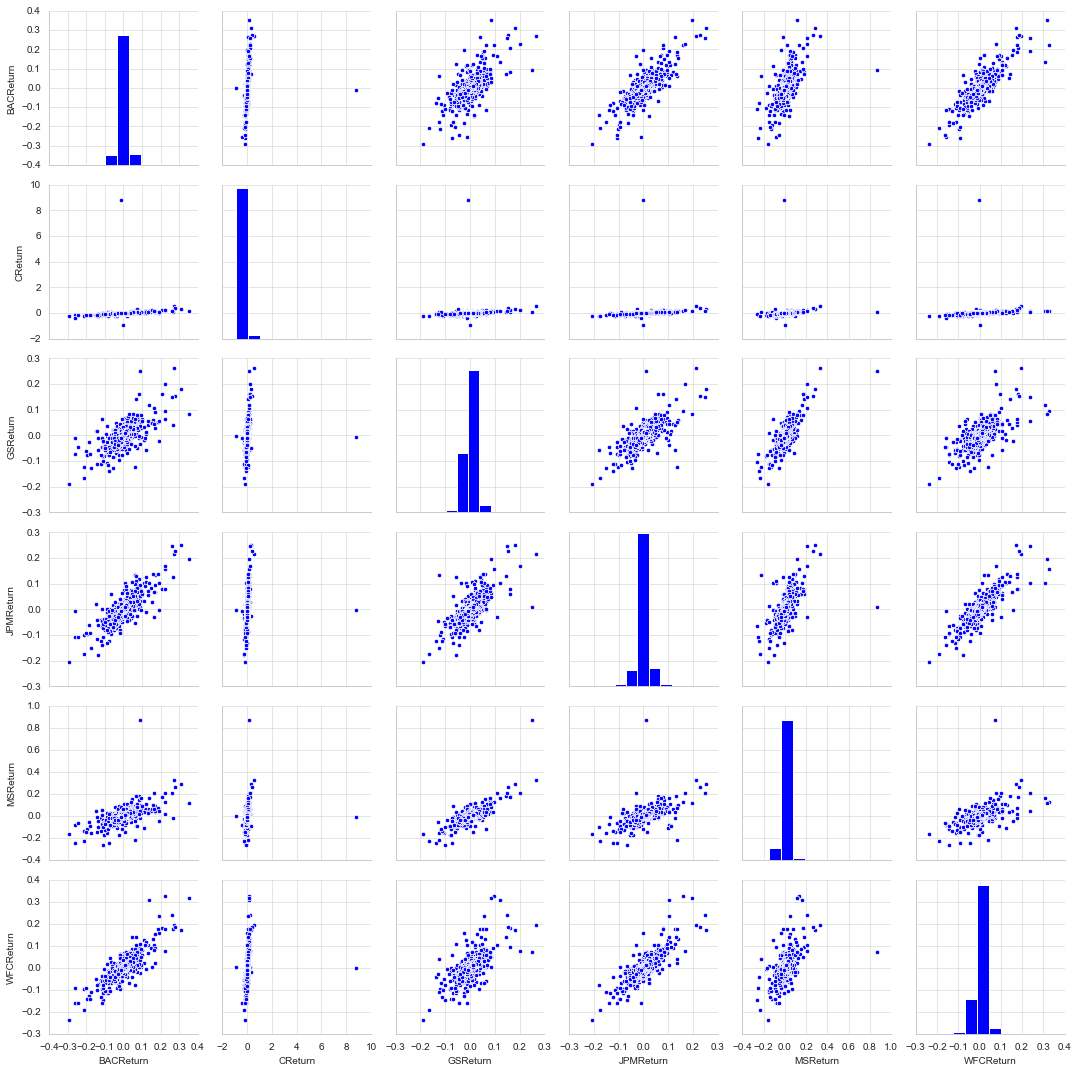

In [215]:
sns.pairplot(returns[1:])

All the plots seem to be relatively normal and there existing some positive correlations between each bank's return except for CitiGroup. The scatterplots for CitiGroup are weird straight line bundles, implying a huge stock crash. This is also supported by what we have obtained before in the *Close* section. To figure out the reason, let's refer to wikipedia.

According to wikipedia, by November 2008, Citigroup was insolvent as a part of global financial crisis which can explain the price crash we discovered here.

- Check dates each bank stock had the best and worst single day returns

In [216]:
returns.idxmin()

BACReturn   2009-01-20
CReturn     2011-05-06
GSReturn    2009-01-20
JPMReturn   2009-01-20
MSReturn    2008-10-09
WFCReturn   2009-01-20
dtype: datetime64[ns]

Notice that 4 of the banks share the same day for the worst drop. And 2009-01-20 was the Inauguration day.

According to investopedia, when President Obama took office on Jan. 20, 2009, the Dow Jones Industrial Average (DJIA) continued its credit crisis slump and fell to 7,550.29, the lowest inaugural performance for the Dow since its creation in 1896.

In [69]:
returns.idxmax()

BACReturn   2009-04-09
CReturn     2011-05-09
GSReturn    2008-11-24
JPMReturn   2009-01-21
MSReturn    2008-10-13
WFCReturn   2008-07-16
dtype: datetime64[ns]

Citigroup's largest drop and biggest gain were very close to one another. This was the result from citigroup's stock split in May 2011, but also JPM day after inauguration.

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

- Standard deviation of the returns over the years

In [70]:
returns.std()

BACReturn    0.036650
CReturn      0.179969
GSReturn     0.025346
JPMReturn    0.027656
MSReturn     0.037820
WFCReturn    0.030233
dtype: float64

Citigroup should be the riskiest, since its standard deviation are almost 8 times as many as others.

** For year 2008

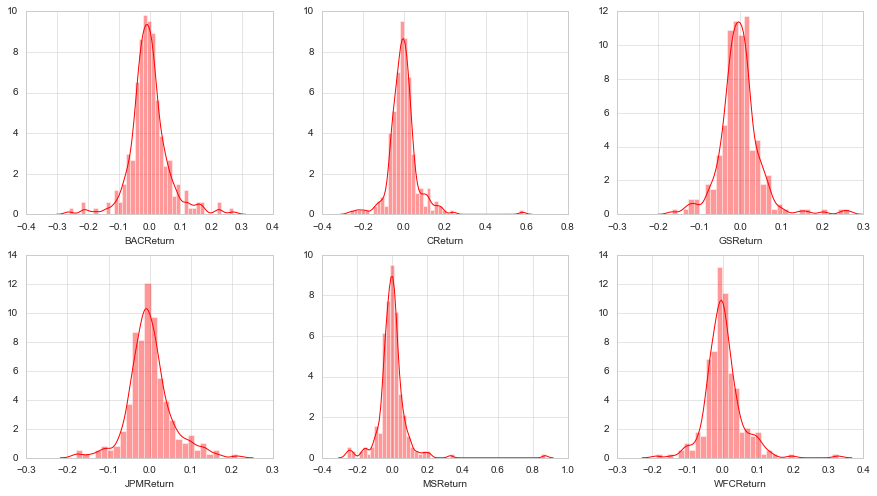

In [268]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,8))
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['BACReturn'][1:], bins=40, color='red', ax=axes[0, 0])
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['CReturn'][1:], color='red', ax=axes[0, 1])
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['GSReturn'][1:], color='red', ax=axes[0, 2])
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['JPMReturn'][1:], color='red', ax=axes[1, 0])
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['MSReturn'][1:], color='red', ax=axes[1, 1])
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['WFCReturn'][1:], color='red', ax=axes[1, 2])

CitiGroup and Morgan Stanley seem to vary the most with the distribution stretched out to 0.6 and 0.9 respectively. 

Let's compare the standard deviation in 2008 with a more normal year say 2015.

** For year 2015

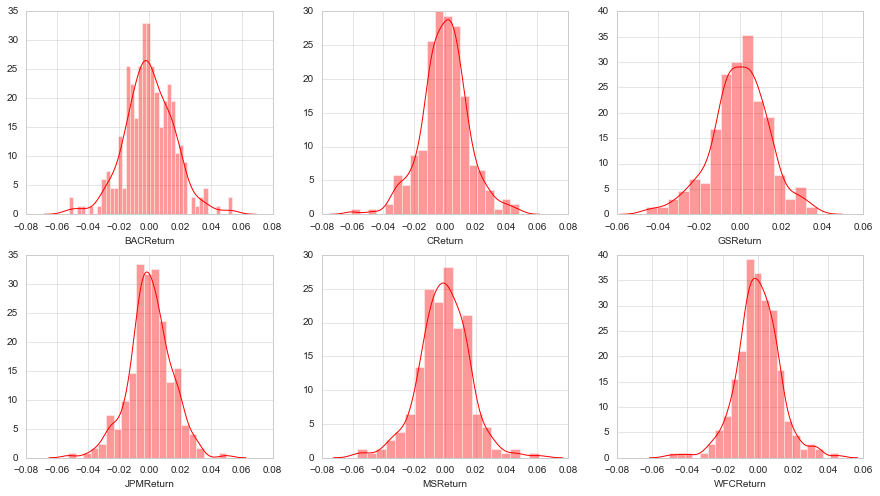

In [269]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,8))
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['BACReturn'][1:], bins=40, color='red', ax=axes[0, 0])
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['CReturn'][1:], color='red', ax=axes[0, 1])
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['GSReturn'][1:], color='red', ax=axes[0, 2])
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['JPMReturn'][1:], color='red', ax=axes[1, 0])
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MSReturn'][1:], color='red', ax=axes[1, 1])
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['WFCReturn'][1:], color='red', ax=axes[1, 2])

For normal year, the prices only stretch over 0.06 which is 10 times samller than the ones for 2008.

### Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

- Plot the rolling 30 day average against the *Close Price* for stocks for the year 2008**

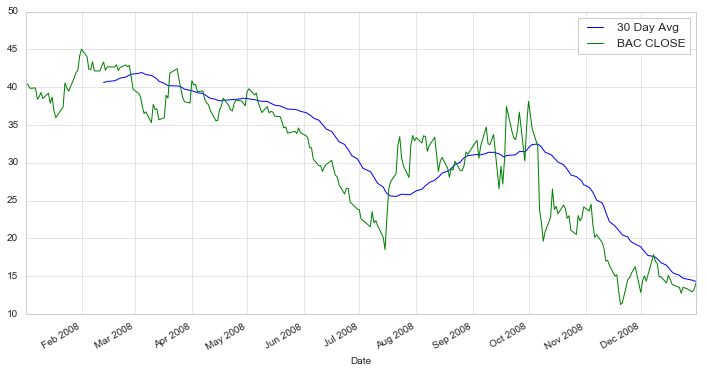

In [131]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

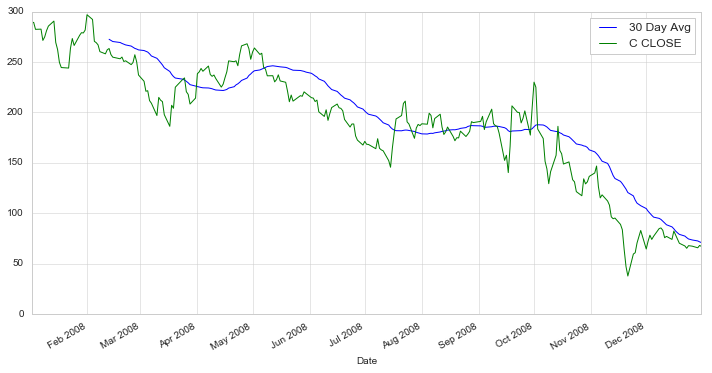

In [272]:
plt.figure(figsize=(12,6))
C['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
C['Close'].loc['2008-01-01':'2009-01-01'].plot(label='C CLOSE')
plt.legend()

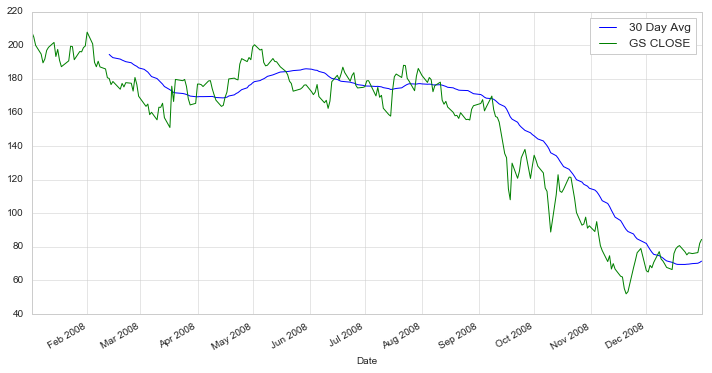

In [277]:
plt.figure(figsize=(12,6))
GS['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
GS['Close'].loc['2008-01-01':'2009-01-01'].plot(label='GS CLOSE')
plt.legend()

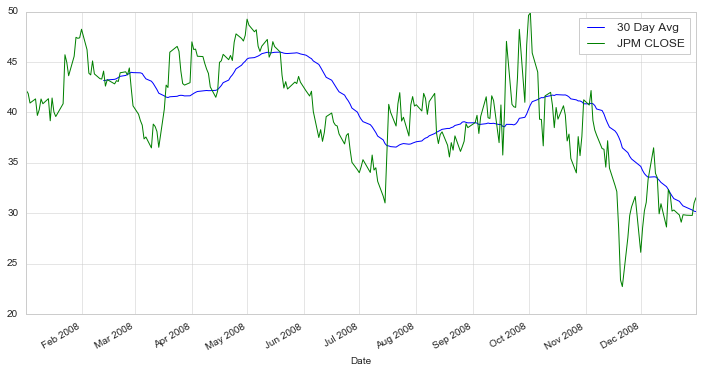

In [278]:
plt.figure(figsize=(12,6))
JPM['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
JPM['Close'].loc['2008-01-01':'2009-01-01'].plot(label='JPM CLOSE')
plt.legend()

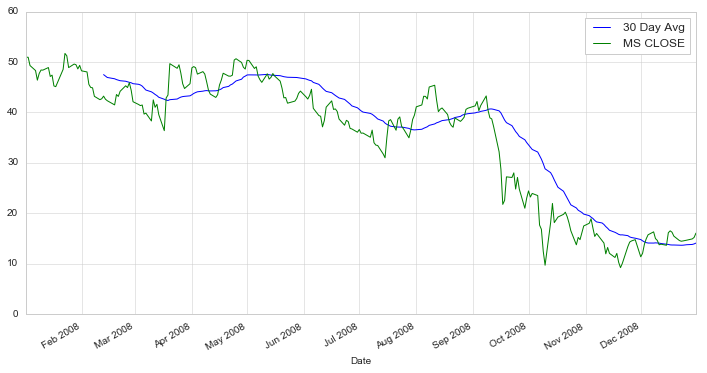

In [279]:
plt.figure(figsize=(12,6))
MS['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
MS['Close'].loc['2008-01-01':'2009-01-01'].plot(label='MS CLOSE')
plt.legend()

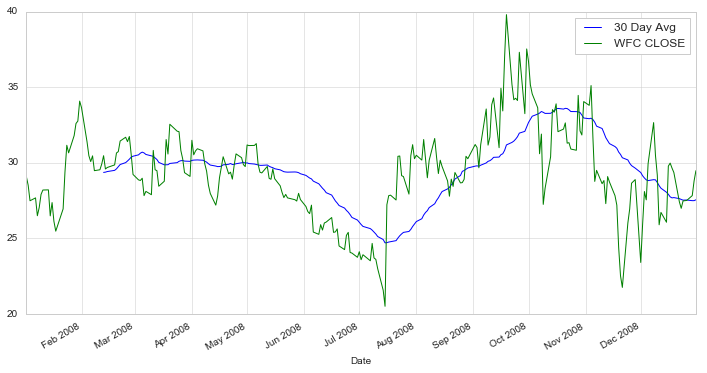

In [280]:
plt.figure(figsize=(12,6))
WFC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
WFC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='WFC CLOSE')
plt.legend()

The stocks prices for all the banks were in the trend of decreasing except for Wells Fargo.

- Create a heatmap of the correlation between the stocks Close Price

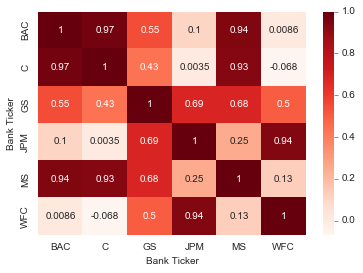

In [282]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True, cmap='Reds')

Interestingly, the stocks prices for Bank of America, CitiGroup and Morgan Stanley are highly correlated with each other mutually. While JPMorgan Chase is highly correlated with Wells Fargo.

- Create a clustermap to cluster the correlations together

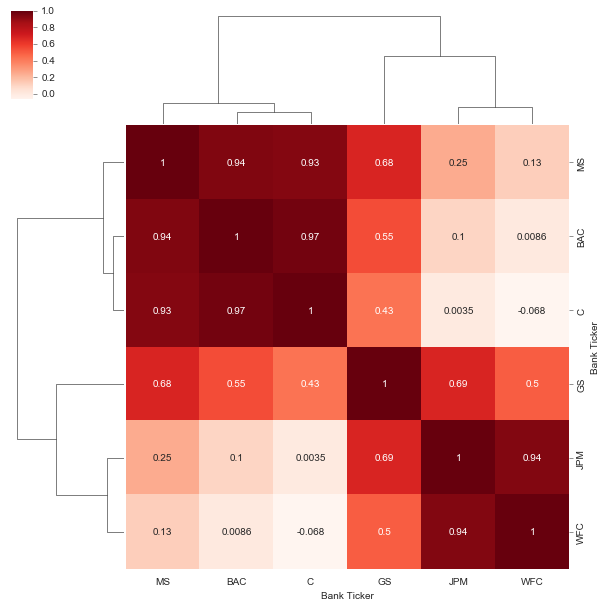

In [153]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(), annot=True, cmap='Reds')

In [152]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='Reds')

## More Visualization

Create more Technical Analysis plots using cufflinks library.

- Candle plot of each banks from Jan 1st 2015 to Jan 1st 2016

In [167]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

In [283]:
C[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

In [284]:
GS[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

In [287]:
JPM[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

In [285]:
MS[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

In [288]:
WFC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

- Simple Moving Averages plot for the year 2015

In [289]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

In [290]:
C['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

In [291]:
GS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

In [292]:
JPM['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

In [293]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

In [294]:
WFC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

- Bollinger Band Plot for the year 2015

In [295]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

In [296]:
C['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

In [297]:
GS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

In [298]:
JPM['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

In [299]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

In [300]:
WFC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

## REFERENCE
- https://matplotlib.org/3.1.0/gallery/index.html
- Udemy course: Python for Machine Learning and Data Science Bootcamp